Starting Notebook for playing with OpenAI Environments
======================================================
Basic starter notebook for playing with the states, actions, and rewards for the OpenAI Gym classic control environments.

# Install OpenAI Gym

In [1]:
!pip install gym

# Minimal install, if on CoLab
If you are running this locally on your laptop or desktop, then you may not need the below, but I need the below to get this to run on a remote server on CoLab (it is mostly to handle the lack of a "display" on a remote server).

In [2]:
!apt install xvfb -y
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [3]:
# Creates a virtual display in CoLab. May not be necessary if locally installed.
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# Now for Actually Exploring Gym
If installed correctly, then the below is how you use it to explore various aspects of the RL Acrobot Environment.

In [4]:
%matplotlib inline
import gym
import numpy as np
# For Plotting:
import matplotlib
import matplotlib.pyplot as plt
# If you want degrees or radians:
import math
# If you want to randomize the states or actions:
import random

Example of Basic loading and plotting in the default state:

Starting in: [ 0.06653821 -0.04589366 -0.02076354 -0.06673324]


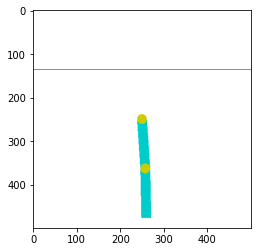

In [5]:
env = gym.make('Acrobot-v1').env
# Need to reset the environment to initialize it
# Resets it to a random configuration hanging down
env.reset()
# The State
# Array is: [top_theta (in rads),         bottom_theta (in_rads),
#            top_theta_dot (in rads/sec), bottom_theta_dot (in_rads/sec)]
print("Starting in:", env.state)
plt.imshow(env.render('rgb_array'))

Example of modifying the initial (reset) state to put the robot into a new state (just for testing/visualization purposes). Normally you would not be able to manipulate the state directly (you could also do this through taking actions). But, for exploring the reward function or actions, this might be useful.

Starting in: [3.14, 1.57, 0.0, 0.0]


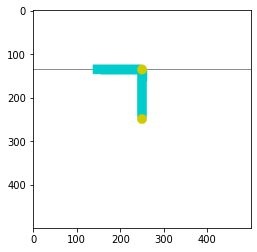

In [6]:
# Now you can set the initial state of the system, if you want to play with it
# Array is: [top_theta (in rads),         bottom_theta (in_rads),
#            top_theta_dot (in rads/sec), bottom_theta_dot (in_rads/sec)]
# Quick ref: 90 degs = 1.57 rads
## Change the below:
env.state = [1.57*2, 1.57, 0.0, 0.0]
# Alternatively, if you prefer degrees
# env.state = [math.radians(90)*2, math.radians(90), 0.0, 0.0]

print("Starting in:", env.state)
plt.imshow(env.render('rgb_array'))

Example of investigating the "before" and "after" of taking various actions. You can use this to get a sense of what different actions do to the system.

Starting in: [0.5, 0, 0.0, 0.0]


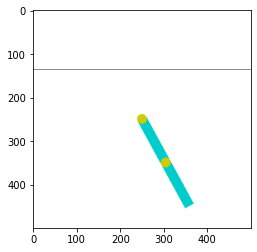

In [7]:
# Before
env.state = [0.5, 0, 0.0, 0.0]
# Alternatively, if you prefer degrees
# env.env.state = [math.radians(90)*2, math.radians(90), 0.0, 0.0]

print("Starting in:", env.state)
plt.imshow(env.render('rgb_array'))

Taking Action: 0
Observation: [ 0.94602702  0.32408775  0.99954791  0.03006626 -0.78265852  0.08899949]
New State: [ 0.33004728  0.03007079 -0.78265852  0.08899949]
Reward: -1.0
Done: False
Info: {}
After:


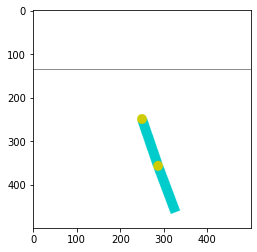

In [8]:
## Change the below to see the effect of actions:
action = 0
print("Taking Action:", action)
env.step(action) # Can be -1, 0, or +1

# Now we compute the "after" of taking that action:
observation, reward, done, info = env.step(action)
# Note that the observation provided by env.step is a little different than
# the input state:
# Input was: Angle 1, Angle 2, Ang_Vel 1, Ang_Vel 2
# But observation returns:
# Output is: ([cos(Ang.1), sin(Ang.1), 
#              cos(Ang.2), sin(Ang.2), 
#              Ang_Vel 1, Ang_Vel 2])
print("Observation:", observation)
# Compare the above with the below to see what I mean:
print("New State:", env.state)
# This allows you to see the "reward" of the new state in "observation"
print("Reward:", reward)
print("Done:", done)
# For Acrobot, the Info part will always be empty. You can ignore it.
# In other environments, there might be other things in here.
print("Info:", info)

print("After:")
plt.imshow(env.render('rgb_array'))
#env.render()

## Re-Running this cell should step through subsequent timesteps

# Studying an episode with random actions

In [9]:
# Episode with random actions
observation = env.reset()

t = 0
while True:
	old_obs = observation
	action = env.action_space.sample()
	observation, reward, done, info = env.step(action)

	print('obs: %s, action: %s, reward: %s' % (old_obs, action, reward))

	t += 1
	if done:
		print('Episode finished after %d timesteps' % t)
		break

obs: [ 0.9988673   0.04758267  0.99880876  0.04879602 -0.02253902 -0.02113014], action: 0, reward: -1.0
obs: [ 0.99866732  0.05160982  0.99995327  0.00966786  0.06070035 -0.36270235], action: 1, reward: -1.0
obs: [ 0.99839221  0.05668324  0.99842196 -0.05615677 -0.01289994 -0.2838324 ], action: 0, reward: -1.0
obs: [ 0.99825035  0.05912908  0.99100324 -0.13383785  0.03420355 -0.4824172 ], action: 1, reward: -1.0
obs: [ 0.99846636  0.05536171  0.97847948 -0.20634415 -0.07309762 -0.2421648 ], action: 1, reward: -1.0
obs: [ 0.99953225  0.03058248  0.97394671 -0.22677698 -0.17021633  0.03210005], action: 0, reward: -1.0
obs: [ 0.99999455  0.00330221  0.97331821 -0.2294595  -0.09725926 -0.06333445], action: 2, reward: -1.0
obs: [ 0.99945413 -0.03303685  0.98263494 -0.18554938 -0.25745703  0.49910744], action: 0, reward: -1.0
obs: [ 0.99768995 -0.06793212  0.99396282 -0.10971746 -0.08264967  0.24938055], action: 0, reward: -1.0
obs: [ 0.99795016 -0.06399599  0.99581325 -0.09141102  0.1216159

The built-in reward function in the acrobot environment outputs -1 when at each timestep until it reaches the goal. And obviously the goal is to maximize the reward.

# Distribution of values in Observation

Episode finished after 1413 timesteps
Episode finished after 2043 timesteps
Episode finished after 1524 timesteps
Episode finished after 1557 timesteps
Episode finished after 775 timesteps
Episode finished after 3993 timesteps
Episode finished after 999 timesteps
Episode finished after 4205 timesteps
Episode finished after 546 timesteps
Episode finished after 2257 timesteps


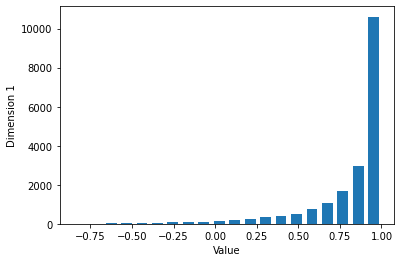

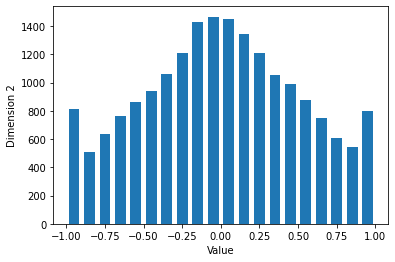

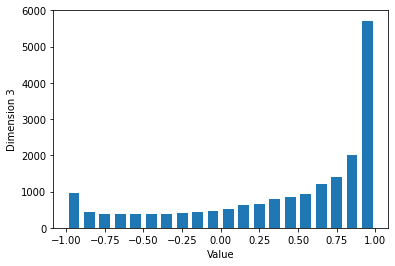

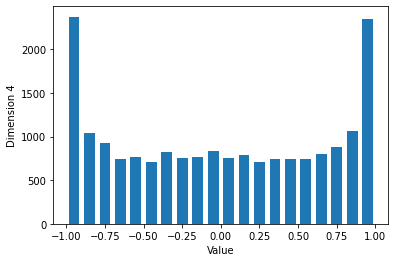

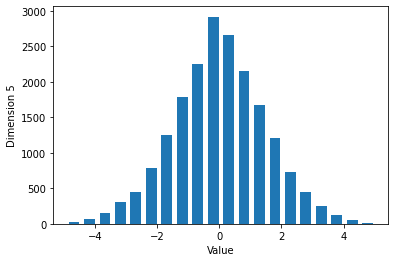

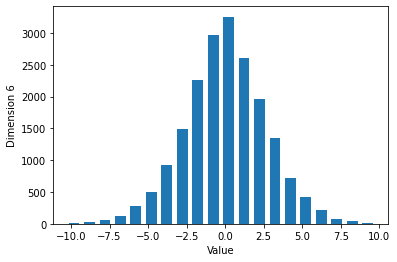

In [10]:
# Plotting 10 episodes of random actions and plotting results in histogram

# Helper function to plot histogram of the various dimensions measured during
# the 10 episodes
def plot_hist(hist_bins, ylabel, filename):
	hist, bins = hist_bins
	width = 0.7 * (bins[1] - bins[0])
	center = (bins[:-1] + bins[1:]) / 2

	plt.bar(center, hist, align='center', width=width)
	plt.ylabel(ylabel)
	plt.xlabel('Value')
	plt.show()

env = gym.make('Acrobot-v1').env
observation = env.reset() # resets environemnt to random down state

# Stores all observations from 10 episodes
observations = []

# Run 10 episodes
for i in range(10):
	t = 0
	while True:
		observations.append(observation)

		action = env.action_space.sample()
		observation, reward, done, info = env.step(action)

		t += 1
		if done:
			env.reset()
			print('Episode finished after %d timesteps' % t)
			break

# 'observations' is an Nx6 matrix, where N is the total number of observations
# Take transpose of observations to plot histgram
observations_trans = np.transpose(observations)

# For each dimension of the observation, create a histogram
# np.histogram returns (hist, bins)
hist_bins = [np.histogram(dim, bins=20) for dim in observations_trans]

# Plot a histogram for each dimension of the observations
# The 6 dimensions are: cos(theta1), sin(theta1), cos(theta2), sin(theta2),
# dtheta1, dtheta1 where theta1 refers to the first link and theta2 is 2nd link
dim_num = 1
for hb in hist_bins:
	plot_hist(hb, 'Dimension %d' % dim_num, 'dim%d.png' % dim_num)
	dim_num += 1

Found that the distribution of cos(theta1) is heavily skewed left with most values being between 0.8 and 1.
Found that the distribution of sin(theta1) is a nearly symmetric around 0 and close to a normal distribution. A large percentage of values are between -0.5 to 0.5. 
Found that the distribution of cos(theta2) is also heavily skew left just like cos(theta1).
Found that the distribution sin(theta2) is random in the middle, but has modes at the left (-1) and right of the histogram (1).
Found that dtheta1 and dtheta are are approximately normal distributions and are centered around 0.

# Setup for Learning using DQN

In [11]:
#!pip install tf-agents

     |████████████████████████████████| 1.1MB 8.4MB/s 


In [12]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import PIL.Image

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

tf.compat.v1.enable_v2_behavior()


# Hyperparameters

In [13]:
# Hyperparameters
num_iterations = 20000

initial_collect_steps = 25 
collect_steps_per_iteration = 1
replay_buffer_max_length = 1000000

batch_size = 48
learning_rate = 1e-4
log_interval = 200

num_eval_episodes = 20  
eval_interval = 1000

# Setting up Testing Environment

In [14]:
env_name = 'Acrobot-v1'
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

# Initialize Q-Network (NN)

In [15]:
fc_layer_params = (256,512)

q_net = q_network.QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

# Initialize Learning Agent

In [16]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

# Initialize Policy

In [17]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

# Metrics for evaluation

In [18]:
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]

Pre-processing of Data and Data Collection using Replay Buffer

In [19]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_max_length)

In [20]:
#@test {"skip": true}
def collect_step(environment, policy, buffer):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  buffer.add_batch(traj)

def collect_data(env, policy, buffer, steps):
  for _ in range(steps):
    collect_step(env, policy, buffer)

collect_data(train_env, random_policy, replay_buffer, initial_collect_steps)

In [21]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size, 
    num_steps=2).prefetch(3)


dataset

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


<PrefetchDataset shapes: (Trajectory(step_type=(48, 2), observation=(48, 2, 6), action=(48, 2), policy_info=(), next_step_type=(48, 2), reward=(48, 2), discount=(48, 2)), BufferInfo(ids=(48, 2), probabilities=(48,))), types: (Trajectory(step_type=tf.int32, observation=tf.float32, action=tf.int64, policy_info=(), next_step_type=tf.int32, reward=tf.float32, discount=tf.float32), BufferInfo(ids=tf.int64, probabilities=tf.float32))>

In [22]:
iterator = iter(dataset)

print(iterator)


# Training the Agent

In [23]:
#@test {"skip": true}
try:
  %%time
except:
  pass

agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  collect_data(train_env, agent.collect_policy, replay_buffer, collect_steps_per_iteration)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 1.0685033798217773
step = 400: loss = 3.3285040855407715
step = 600: loss = 3.8571691513061523
step = 800: loss = 7.147151947021484
step = 1000: loss = 6.339764595031738
step = 1000: Average Return = -500.0
step = 1200: loss = 17.94336700439453
step = 1400: loss = 13.809942245483398
step = 1600: loss = 41.2800407409668
step = 1800: loss = 23.872594833374023
step = 2000: loss = 9.180434226989746
step = 2000: Average Return = -500.0
step = 2200: loss = 5.698652267456055
step = 2400: loss = 10.147257804870605
step = 2600: loss = 5.574037075042725
step = 2800: loss = 6.817503929138184
step = 3000: loss = 25.5291805267334
step = 3000: Average Return = -190.6999969482422
step = 3200: loss = 17.640758514404297
step = 3400: loss = 12.565943717956543
step = 3600: loss = 6.427295684814453
step = 3800: loss = 2.9470410346984863
step = 4000: loss = 13.121515274047852
step = 4000: Average Return = -500.0
step = 4200: loss = 7.334949493408203
step = 4400: loss = 9.587808609008789


# Visualization of Improvement During Training

(-520.6974998474121, 0.0)

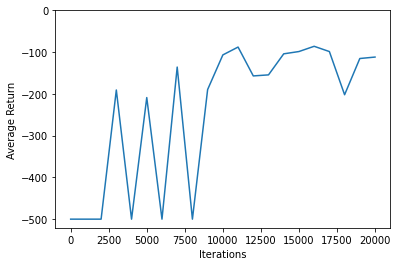

In [24]:
#@test {"skip": true}

iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.ylim(top=0)

# Video Evaluation of Policy

In [25]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [26]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)




create_policy_eval_video(agent.policy, "trained-agent")

# Comparison to No Training

In [27]:
create_policy_eval_video(random_policy, "random-agent")